In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD

In [0]:
def scores(classifier, X, y):
    precision = cross_val_score(classifier, X, y, cv=10, scoring='precision').mean()
    recall = cross_val_score(classifier, X, y, cv=10, scoring='recall').mean()
    f1 = cross_val_score(classifier, X, y, cv=10, scoring='f1').mean()
    columns = ['precision', 'recall', 'f1']
    results = pd.DataFrame([precision, recall, f1], index=columns).T
    return results

In [0]:
df = pd.read_csv('sin_movie.csv')

1000 положительных и 1000 отрицательных отзывов
* столбец text - просто текст отзыва
* столбец sin_text - синтаксические биграммы, построенные по дереву зависимостей

In [5]:
df

,text,labels,sin_text
0,now that boogie nights has made disco respecta...,1.0,surprisedmade madenow madethat madenights nigh...
1,based on the relatively unknown in comparison ...,1.0,tellscomparison comparisonbased comparisonon c...
2,i was going to see ram shrasta on the big scre...,0.0,goingi goingwas goingsee seeto seeshrasta shra...
3,i wonder if budget is at all a criterion for w...,0.0,wonderi wondercriterion criterionif criterionb...
4,modern audiences are more likely to be familia...,1.0,likelyaudiences audiencesmodern likelyare like...
...,...,...,...
1995,call me crazy but i don t see saving private r...,1.0,callme callcrazy callsee seebut seei it tdon s...
1996,s alien marked not only the death by suicide o...,1.0,includedmarked markeds markedalien markedsavag...
1997,plot two sister witches have to live with a cu...,0.0,plotwitches witchestwo witchessister plothave ...
1998,deserves recognition for achieving the near im...,0.0,deservesrecognition deservesachieving achievin...


In [0]:
df['all'] = df['text'] + df['sin_text']

In [0]:
vectorizer = TfidfVectorizer()
vectorizer2 = TfidfVectorizer(min_df=2)

X = vectorizer.fit_transform(df['text'])
XS = vectorizer.fit_transform(df['sin_text'])
X_text2 = vectorizer2.fit_transform(df['text'])
X_sin_text2 = vectorizer2.fit_transform(df['sin_text'])
X_all = vectorizer.fit_transform(df['all'])
X_all2 = vectorizer2.fit_transform(df['all'])

y = df['labels']

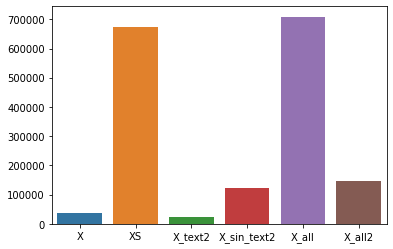

In [0]:
sns.barplot(['X', 'XS', 'X_text2', 'X_sin_text2', 'X_all', 'X_all2'], 
            [X.shape[1], XS.shape[1], X_text2.shape[1], X_sin_text2.shape[1], X_all.shape[1], X_all2.shape[1]])

In [0]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Почти везде нули, но где-то внутри есть другие числа

In [0]:
mnb = MultinomialNB()

In [0]:
scores(log, X_text2, y)

In [17]:
for i in [X, XS, X_text2, X_sin_text2, X_all, X_all2]:
  print(scores(mnb, i, y))

   precision  recall        f1
0   0.854463   0.746  0.795236
   precision  recall        f1
0   0.848442    0.83  0.838361
   precision  recall        f1
0   0.849594   0.762  0.802463
   precision  recall        f1
0   0.843795    0.84  0.841374
   precision  recall        f1
0   0.820806    0.87  0.843945
   precision  recall       f1
0   0.838761   0.843  0.84016


In [33]:
svd = TruncatedSVD(n_components=100, random_state=42)
S = svd.fit_transform(X)
print(svd.explained_variance_ratio_)

[0.01078066 0.00666376 0.00535691 0.00411766 0.00318742 0.00312677
 0.0030082  0.00283088 0.00274463 0.00259651 0.00253402 0.00250346
 0.00245298 0.00241359 0.00232074 0.0022612  0.00222353 0.002163
 0.00209541 0.00206812 0.0020282  0.00200196 0.00197357 0.00193517
 0.00190717 0.00187404 0.0018443  0.00181094 0.00180345 0.00178592
 0.00177986 0.00175901 0.00174918 0.0017235  0.00171887 0.00170613
 0.00170049 0.00167549 0.00166596 0.00165086 0.00164888 0.00161636
 0.00159651 0.00158158 0.00157477 0.00156097 0.00154093 0.00153274
 0.0015131  0.00149491 0.00148973 0.00147967 0.00147287 0.00146277
 0.00145713 0.00145232 0.00143438 0.00142695 0.00140905 0.00140289
 0.00139449 0.00137873 0.00137333 0.00136528 0.00135013 0.00134175
 0.00133778 0.00132474 0.00131904 0.00130943 0.00129438 0.00128808
 0.00127751 0.00126709 0.00125771 0.00124893 0.00123969 0.0012375
 0.00123457 0.0012149  0.00120754 0.00120582 0.00119327 0.00118324
 0.00117617 0.00117453 0.00116906 0.00115588 0.00115082 0.0011460

In [25]:
svd = TruncatedSVD(n_components=200, n_iter=20, random_state=42)
sX = svd.fit_transform(X)
print(svd.explained_variance_ratio_.sum())
sXS = svd.fit_transform(XS)
print(svd.explained_variance_ratio_.sum())
sX_text2 = svd.fit_transform(X_text2)
print(svd.explained_variance_ratio_.sum())
sX_sin_text2 = svd.fit_transform(X_sin_text2)
print(svd.explained_variance_ratio_.sum())
sX_all = svd.fit_transform(X_all)
print(svd.explained_variance_ratio_.sum())
sX_all2 = svd.fit_transform(X_all2)
print(svd.explained_variance_ratio_.sum())

0.2897589263113733
0.12859618389948776
0.30235490605855386
0.1598068993548558
0.1699115234299472
0.21535206452090017


In [0]:
svd = TruncatedSVD(n_components=200, n_iter=20, random_state=42)
sX = svd.fit_transform(X)
sXS = svd.fit_transform(XS)
sX_all = svd.fit_transform(X_all)

In [26]:
svd = TruncatedSVD(n_components=1000, n_iter=20, random_state=42)
vX = svd.fit_transform(X)
print(svd.explained_variance_ratio_.sum())
vXS = svd.fit_transform(XS)
print(svd.explained_variance_ratio_.sum())
vX_text2 = svd.fit_transform(X_text2)
print(svd.explained_variance_ratio_.sum())
vX_sin_text2 = svd.fit_transform(X_sin_text2)
print(svd.explained_variance_ratio_.sum())
vX_all = svd.fit_transform(X_all)
print(svd.explained_variance_ratio_.sum())
vX_all2 = svd.fit_transform(X_all2)
print(svd.explained_variance_ratio_.sum())

0.7528713259869171
0.545169520281136
0.7684082100396767
0.6009127582168385
0.595608743496902
0.659553028522623


In [0]:
for i in [sX, sXS, sX_text2, sX_sin_text2, sX_all, sX_all2]:
  i = i + abs(i.min(axis=0))
  print(scores(mnb, i, y))

   accuracy  precision  recall        f1
0    0.8085   0.812505   0.805  0.807881
   accuracy  precision  recall        f1
0     0.811   0.812708   0.811  0.810907
   accuracy  precision  recall       f1
0    0.8135   0.818393   0.808  0.81247
   accuracy  precision  recall        f1
0       0.8   0.791824   0.816  0.803043
   accuracy  precision  recall        f1
0    0.8175   0.825739   0.807  0.815386
   accuracy  precision  recall        f1
0     0.815   0.820697   0.808  0.813515


In [0]:
for i in [vX, vXS, vX_text2, vX_sin_text2, vX_all, vX_all2]:
  i = i + abs(i.min(axis=0))
  print(scores(mnb, i, y))

   precision  recall        f1
0   0.801321   0.803  0.801439
   precision  recall        f1
0   0.723701   0.708  0.713786
   precision  recall        f1
0   0.801504   0.808  0.804094
   precision  recall        f1
0   0.729219   0.748  0.737067
   precision  recall        f1
0   0.793124    0.76  0.775201
   precision  recall        f1
0   0.795789   0.789  0.791771


In [0]:
rfc = RandomForestClassifier(random_state=42)

In [20]:
for i in [X, XS, X_text2, X_sin_text2, X_all, X_all2]:
  print(scores(rfc, i, y))

   precision  recall        f1
0   0.831161   0.738  0.780854
   precision  recall        f1
0   0.748245   0.757  0.752321
   precision  recall        f1
0   0.823388   0.726  0.770648
   precision  recall        f1
0   0.771338   0.732  0.750305
   precision  recall        f1
0   0.811309   0.729  0.767415
   precision  recall       f1
0   0.834977   0.751  0.78995


In [0]:
for i in [sX, sXS, sX_text2, sX_sin_text2, sX_all, sX_all2]:
  print(scores(rfc, i, y))

   accuracy  precision  recall        f1
0    0.7675    0.77641   0.752  0.763758
   accuracy  precision  recall        f1
0    0.7645   0.774911   0.747  0.759699
   accuracy  precision  recall        f1
0     0.766   0.766616   0.766  0.765777
   accuracy  precision  recall        f1
0    0.7665   0.780732   0.745  0.761527
   accuracy  precision  recall        f1
0    0.7875   0.795024   0.775  0.784534
   accuracy  precision  recall        f1
0    0.7985   0.808906   0.784  0.795628


In [0]:
for i in [vX, vXS, vX_text2, vX_sin_text2, vX_all, vX_all2]:
  print(scores(rfc, i, y))

   precision  recall        f1
0   0.722541   0.642  0.679377
   precision  recall        f1
0   0.734635   0.675  0.701908
   precision  recall        f1
0   0.713918   0.595  0.648416
   precision  recall        f1
0   0.722159   0.661  0.689075
   precision  recall        f1
0   0.730757   0.646  0.684857
   precision  recall        f1
0   0.735045   0.641  0.683299


In [0]:
log = LogisticRegression(random_state=42)

In [22]:
for i in [X, XS, X_text2, X_sin_text2, X_all, X_all2]:
  print(scores(log, i, y))

   precision  recall        f1
0   0.833684   0.825  0.828821
   precision  recall        f1
0   0.821313   0.822  0.820912
   precision  recall       f1
0   0.828663   0.827  0.82746
   precision  recall        f1
0   0.826475   0.822  0.823337
   precision  recall        f1
0   0.822988   0.775  0.797998
   precision  recall        f1
0   0.828998   0.804  0.815877


In [0]:
for i in [sX, sXS, sX_text2, sX_sin_text2, sX_all, sX_all2]:
  print(scores(log, i, y))

   precision  recall       f1
0   0.833565   0.827  0.82977
   precision  recall       f1
0   0.836201   0.844  0.83921
   precision  recall       f1
0    0.83083   0.824  0.82697
   precision  recall        f1
0   0.834063   0.843  0.837583
   precision  recall        f1
0   0.854734   0.834  0.843878
   precision  recall        f1
0   0.844297   0.837  0.840445


In [0]:
for i in [vX, vXS, vX_text2, vX_sin_text2, vX_all, vX_all2]:
  print(scores(log, i, y))

   precision  recall        f1
0   0.827894   0.832  0.829553
   precision  recall        f1
0   0.816658   0.804  0.809454
   precision  recall        f1
0   0.828695   0.831  0.829394
   precision  recall        f1
0   0.826179   0.823  0.824208
   precision  recall        f1
0   0.854653   0.819  0.836005
   precision  recall        f1
0   0.849018   0.825  0.836065


In [0]:
for i in range(100, 1001, 100):
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X_sin_text2)
  print(i)
  S = S + abs(S.min(axis=0))
  print(scores(mnb, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0      0.78   0.777206   0.786  0.780955
#####
200
   accuracy  precision  recall        f1
0       0.8   0.791824   0.816  0.803043
#####
300
   accuracy  precision  recall        f1
0    0.7905   0.788082   0.797  0.791648
#####
400
   accuracy  precision  recall        f1
0     0.792   0.784752   0.808  0.795204
#####
500
   accuracy  precision  recall        f1
0     0.792    0.78771   0.805  0.794744
#####
600
   accuracy  precision  recall        f1
0    0.7715   0.765576   0.785  0.774431
#####
700
   accuracy  precision  recall        f1
0    0.7605     0.7576   0.771  0.763165
#####
800
   accuracy  precision  recall       f1
0    0.7465   0.738173   0.769  0.75179
#####
900
   accuracy  precision  recall        f1
0     0.732   0.723894   0.755  0.738167
#####
1000
   accuracy  precision  recall        f1
0     0.733   0.729219   0.748  0.737067
#####


In [0]:
for i in range(100, 301, 10):
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X_sin_text2)
  print(i)
  S = S + abs(S.min(axis=0))
  print(scores(mnb, S, y))
  print('#####')

100
   precision  recall        f1
0   0.777206   0.786  0.780955
#####
110
   precision  recall        f1
0   0.782337    0.79  0.785288
#####
120
   precision  recall        f1
0   0.781816   0.806  0.793049
#####
130
   precision  recall        f1
0   0.785265   0.816  0.799643
#####
140
   precision  recall        f1
0   0.778982   0.803  0.789899
#####
150
   precision  recall        f1
0     0.7847   0.801  0.791807
#####
160
   precision  recall       f1
0    0.78367   0.812  0.79688
#####
170
   precision  recall        f1
0    0.78748   0.809  0.797282
#####
180
   precision  recall       f1
0   0.789787   0.812  0.79964
#####
190
   precision  recall        f1
0   0.787343   0.812  0.798434
#####
200
   precision  recall        f1
0   0.791824   0.816  0.803043
#####
210
   precision  recall        f1
0   0.792611   0.827  0.808454
#####
220
   precision  recall        f1
0   0.782699   0.816  0.798429
#####
230
   precision  recall        f1
0   0.787394   0.813  0.798935
##

In [0]:
for i in range(100, 1001, 100):
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X_all2)
  print(i)
  S = S + abs(S.min(axis=0))
  print(scores(mnb, S, y))
  print('#####')

100
   precision  recall        f1
0    0.79978   0.788  0.793233
#####
200
   precision  recall        f1
0   0.820697   0.808  0.813515
#####
300
   precision  recall        f1
0    0.82387    0.81  0.816494
#####
400
   precision  recall       f1
0   0.815123   0.809  0.81164
#####
500
   precision  recall        f1
0   0.812461   0.804  0.807751
#####
600
   precision  recall        f1
0   0.810746     0.8  0.804818
#####
700
   precision  recall        f1
0   0.811683   0.806  0.808225
#####
800
   precision  recall        f1
0   0.807103   0.802  0.803806
#####
900
   precision  recall        f1
0   0.806166   0.799  0.801633
#####
1000
   precision  recall        f1
0   0.795789   0.789  0.791771
#####


In [0]:
log = LogisticRegression(solver='saga', random_state=42)

In [28]:
for i in [X, XS, X_text2, X_sin_text2, X_all, X_all2]:
  print(scores(log, i, y))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   precision  recall       f1
0   0.832107   0.826  0.82857
   precision  recall        f1
0   0.816442   0.826  0.820443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   precision  recall        f1
0   0.829176    0.83  0.829231
   precision  recall        f1
0   0.826841   0.824  0.824516


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   precision  recall        f1
0   0.822661   0.778  0.799422


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   precision  recall        f1
0    0.83176    0.81  0.820358


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
l_svc = LinearSVC(random_state=42)

In [0]:
for i in [X, XS, X_text2, X_sin_text2, sX_all, sX_all2]:
  print(scores(l_svc, i, y))

   precision  recall        f1
0   0.855514   0.866  0.860514
   precision  recall       f1
0    0.82921    0.84  0.83375
   precision  recall       f1
0    0.85338   0.863  0.85788
   precision  recall        f1
0   0.835879   0.846  0.840256
   precision  recall        f1
0   0.859434   0.869  0.863754
   precision  recall        f1
0   0.861755   0.871  0.865776


In [30]:
for i in [sX, sXS, sX_text2, sX_sin_text2, sX_all, sX_all2]:
  print(scores(l_svc, i, y))

   precision  recall        f1
0   0.857807   0.851  0.854153
   precision  recall        f1
0   0.837822   0.848  0.842005
   precision  recall        f1
0   0.857278   0.851  0.853776
   precision  recall        f1
0   0.842915    0.85  0.845464
   precision  recall        f1
0   0.862322    0.87  0.865908
   precision  recall       f1
0   0.859252   0.872  0.86517


In [0]:
for i in [vX, vXS, vX_text2, vX_sin_text2, vX_all, vX_all2]:
  print(scores(l_svc, i, y))

   precision  recall        f1
0   0.830922   0.851  0.840659
   precision  recall        f1
0   0.801053   0.795  0.797186
   precision  recall        f1
0    0.83837   0.851  0.844416
   precision  recall       f1
0   0.817181    0.82  0.81796
   precision  recall        f1
0   0.838502   0.835  0.836424
   precision  recall        f1
0   0.848213    0.85  0.848837


In [0]:
from sklearn.svm import SVC

In [0]:
svc = SVC(random_state=42)

In [0]:
for i in [X, XS, X_text2, X_sin_text2]:
  print(scores(svc, i, y))

   accuracy  precision  recall        f1
0    0.8415    0.84599   0.837  0.840825
   accuracy  precision  recall        f1
0     0.808   0.799837   0.824  0.811212
   accuracy  precision  recall        f1
0    0.8455   0.848555   0.843  0.845154
   accuracy  precision  recall        f1
0    0.8195   0.824636   0.814  0.818523


In [0]:
rfc = RandomForestClassifier(random_state=42)

In [0]:
for i in [X, XS, X_text2, X_sin_text2]:
  print(scores(rfc, i, y))

   accuracy  precision  recall        f1
0     0.794   0.831161   0.738  0.780854
   accuracy  precision  recall        f1
0     0.751   0.748245   0.757  0.752321
   accuracy  precision  recall        f1
0    0.7845   0.823388   0.726  0.770648
   accuracy  precision  recall        f1
0    0.7565   0.771338   0.732  0.750305


<2000x38885 sparse matrix of type '<class 'numpy.float64'>'
	with 663107 stored elements in Compressed Sparse Row format>

In [0]:
scores(log, X_text2, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

,accuracy,precision,recall,f1
0,0.829,0.829176,0.83,0.829231


In [0]:
random_grid = {'n_estimators': [i for i in range(100, 601, 100)],
               'max_features': 2**np.arange(1, 15),
               'max_depth': [i for i in range(10, 111, 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

In [0]:
for ite in [sX_text2, sX_sin_text2, sX_all2]:
  rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
  rf_random.fit(ite, y)
  print(scores(rf_random.best_estimator_, ite, y))
  print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.2min finished


   precision  recall        f1
0   0.806607   0.792  0.798559
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.7min finished


   precision  recall        f1
0   0.791494   0.789  0.789431
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.3min finished


   precision  recall        f1
0   0.810176   0.809  0.809356


In [12]:
for ite in [sX, sXS, sX_all]:
  rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
  rf_random.fit(ite, y)
  print(scores(rf_random.best_estimator_, ite, y))
  print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.0min finished


   precision  recall        f1
0   0.798914   0.808  0.803101
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 8, 'max_depth': 60}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished


   precision  recall        f1
0   0.777643   0.748  0.761679
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 4, 'max_depth': 60}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.0min finished


   precision  recall       f1
0   0.808571   0.807  0.80743
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 30}


In [13]:
for ite in [X, XS, X_all]:
  rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
  rf_random.fit(ite, y)
  print(scores(rf_random.best_estimator_, ite, y))
  print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 45.9min finished


   precision  recall        f1
0   0.841304   0.811  0.825293
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 512, 'max_depth': 20}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 82.7min finished


   precision  recall        f1
0   0.783932   0.765  0.773821
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 128, 'max_depth': 40}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 80.9min finished


   precision  recall       f1
0   0.854001   0.812  0.83171
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 16384, 'max_depth': 40}


In [0]:
for ite in [sX, sXS, sX_all]:
  rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
  rf_random.fit(ite, y)
  print(scores(rf_random.best_estimator_, ite, y))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.2min finished


   precision  recall        f1
0   0.800136   0.797  0.797881
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.5min finished


   precision  recall        f1
0   0.773639   0.745  0.757877
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min


In [0]:
[vX, vXS, vX_text2, vX_sin_text2, vX_all, vX_all2]

In [0]:
for ite in [vX, vXS,vX_all]:
  rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
  rf_random.fit(ite, y)
  print(scores(rf_random.best_estimator_, ite, y))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.1min finished


   precision  recall        f1
0   0.789651   0.726  0.756031
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.8min finished


   precision  recall        f1
0    0.75971   0.731  0.744553
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.7min finished


   precision  recall        f1
0   0.797089   0.734  0.763943


In [0]:
for ite in [vX_text2, vX_sin_text2, vX_all2]:
  rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
  rf_random.fit(ite, y)
  print(scores(rf_random.best_estimator_, ite, y))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.2min finished


   precision  recall        f1
0   0.793223   0.734  0.762256
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.8min finished


   precision  recall        f1
0   0.755044   0.738  0.745017
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.8min finished


   precision  recall        f1
0   0.794596   0.733  0.761921


In [0]:
vX_text2.shape

(2000, 1000)

In [0]:
svd = TruncatedSVD(n_components=120, n_iter=20, random_state=42)
T = svd.fit_transform(X_text2)
scores(log, T, y)

,accuracy,precision,recall,f1
0,0.8195,0.821565,0.819,0.819637


In [0]:
svd = TruncatedSVD(n_components=200, n_iter=20, random_state=42)
T2 = svd.fit_transform(X_text2)
scores(log, T2, y)

,accuracy,precision,recall,f1
0,0.8275,0.83083,0.824,0.82697


In [0]:
scores(log, X_sin_text2, y)

,accuracy,precision,recall,f1
0,0.8245,0.826841,0.824,0.824516


In [0]:
svd = TruncatedSVD(n_components=120, n_iter=20, random_state=42)
S = svd.fit_transform(X_sin_text2)
scores(log, S, y)

,accuracy,precision,recall,f1
0,0.819,0.817867,0.824,0.819958


In [0]:
svd = TruncatedSVD(n_components=200, n_iter=20, random_state=42)
S2 = svd.fit_transform(X_sin_text2)
scores(log, S2, y)

,accuracy,precision,recall,f1
0,0.837,0.834162,0.844,0.838185


In [0]:
scores(log, X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

,accuracy,precision,recall,f1
0,0.829,0.832107,0.826,0.82857


In [0]:
svd = TruncatedSVD(n_components=120, n_iter=20, random_state=42)
Tt = svd.fit_transform(X)
scores(log, Tt, y)

,accuracy,precision,recall,f1
0,0.82,0.822576,0.819,0.820111


In [0]:
svd = TruncatedSVD(n_components=200, n_iter=20, random_state=42)
Tt2 = svd.fit_transform(X)
scores(log, Tt2, y)

,accuracy,precision,recall,f1
0,0.83,0.833565,0.827,0.82977


### SVD 

Сначала подберем параметр n_iter

In [0]:
ite = [i for i in range(5, 51, 5)]

In [0]:
for i in ite:
  svd = TruncatedSVD(n_components=120, n_iter=i, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(log, S, y))
  print('#####')

5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   accuracy  precision  recall        f1
0     0.498   0.498593   0.782  0.608407
#####
10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   accuracy  precision  recall        f1
0     0.537   0.523176   0.865  0.651318
#####
15


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   accuracy  precision  recall        f1
0     0.568   0.542461   0.886  0.672337
#####
20


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   accuracy  precision  recall        f1
0     0.573   0.545455   0.889  0.675553
#####
25


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

   accuracy  precision  recall        f1
0     0.575   0.546263   0.898  0.678725
#####


KeyboardInterrupt: ignored

In [0]:
svd = TruncatedSVD(n_components=120, n_iter=100, random_state=42)
S = svd.fit_transform(X)
scores(log, S, y)

,accuracy,precision,recall,f1
0,0.8175,0.814679,0.824,0.818636


Возьмем n_iter=40, так как дальше нет улучшения качества

In [0]:
knn = KNeighborsClassifier()

In [0]:
comp = [100, 150, 200, 500, 1000]

In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(knn, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0    0.6915   0.679791   0.726  0.701589
#####
150
   accuracy  precision  recall        f1
0    0.6645   0.645947   0.728  0.683441
#####
200
   accuracy  precision  recall        f1
0     0.659   0.649337   0.699  0.671755
#####
500
   accuracy  precision  recall        f1
0    0.6515   0.619726   0.785  0.692029
#####
1000
   accuracy  precision  recall       f1
0    0.6335   0.620566    0.69  0.65216
#####


In [0]:
rfc = RandomForestClassifier()

In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(rfc, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0    0.7625   0.782226   0.752  0.751893
#####
150
   accuracy  precision  recall        f1
0      0.77   0.782479   0.745  0.758005
#####
200
   accuracy  precision  recall        f1
0     0.764   0.764812   0.748  0.759266
#####
500
   accuracy  precision  recall        f1
0    0.7485   0.744195   0.723  0.731353
#####
1000
   accuracy  precision  recall        f1
0    0.7145   0.726789   0.667  0.690386
#####


In [0]:
svc = LinearSVC()

In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(svc, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0    0.8125    0.81084   0.817  0.813096
#####
150
   accuracy  precision  recall        f1
0     0.822   0.815378   0.835  0.824408
#####
200
   accuracy  precision  recall        f1
0     0.841   0.837822   0.848  0.842005
#####
500
   accuracy  precision  recall        f1
0    0.8355   0.838187   0.835  0.835619
#####
1000
   accuracy  precision  recall        f1
0     0.798   0.801053   0.795  0.797186
#####


In [0]:
X_sin_text2

In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X_sin_text2)
  print(i)
  print(scores(svc, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0      0.82   0.819743   0.822  0.820015
#####
150
   accuracy  precision  recall        f1
0    0.8315    0.82523   0.843  0.833367
#####
200
   accuracy  precision  recall        f1
0    0.8445   0.842915    0.85  0.845464
#####
500
   accuracy  precision  recall        f1
0    0.8445   0.841881   0.851  0.845557
#####
1000
   accuracy  precision  recall       f1
0    0.8175   0.817181    0.82  0.81796
#####


In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X_text2)
  print(i)
  print(scores(svc, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0    0.8325   0.833256   0.833  0.832816
#####
150
   accuracy  precision  recall        f1
0     0.841   0.836666   0.849  0.842335
#####
200
   accuracy  precision  recall        f1
0     0.854   0.857278   0.851  0.853776
#####
500
   accuracy  precision  recall        f1
0      0.85   0.847343   0.856  0.850989
#####
1000
   accuracy  precision  recall        f1
0     0.843    0.83837   0.851  0.844416
#####


In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X_text)
  print(i)
  print(scores(svc, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0    0.8325    0.83444   0.832  0.832783
#####
150
   accuracy  precision  recall      f1
0      0.84   0.837988   0.844  0.8406
#####
200
   accuracy  precision  recall        f1
0    0.8545   0.857807   0.851  0.854153
#####
500
   accuracy  precision  recall        f1
0    0.8525   0.850332   0.858  0.853322
#####
1000
   accuracy  precision  recall        f1
0    0.8385   0.830922   0.851  0.840659
#####


In [0]:
vectorizer2 = TfidfVectorizer(min_df=4)
X_text4 = vectorizer2.fit_transform(df['text'])
X_sin_text4 = vectorizer2.fit_transform(df['sin_text'])

NameError: ignored

In [0]:
comp2 = [300, 400, 600]

In [0]:
for i in comp2:
  svd = TruncatedSVD(n_components=i, n_iter=20, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(log, S, y))
  print('#####')

NameError: ignored

Допустим оптимальными будут n_components=200 и n_iter=40

In [0]:
svd = TruncatedSVD(n_components=200, n_iter=40, random_state=42)
S = svd.fit_transform(X_text)

In [0]:
S.shape

(2000, 200)

#### LogisticRegression

In [0]:
scores(log, S, y)

,accuracy,precision,recall,f1
0,0.8465,0.853859,0.838,0.845398


#### KNN

In [0]:
knn = KNeighborsClassifier()

In [0]:
scores(knn, Tt2, y)

,accuracy,precision,recall,f1
0,0.706,0.675946,0.794,0.729933


In [0]:
scores(knn, T2, y)

,accuracy,precision,recall,f1
0,0.71,0.684979,0.779,0.728626


In [0]:
scores(knn, S2, y)

,accuracy,precision,recall,f1
0,0.698,0.701897,0.694,0.696633


Подбор параметров для knn

In [0]:
random_grid = {'n_neighbors': [i for i in range(5, 500, 10)],
               'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
               }
knn_random = GridSearchCV(knn, random_grid, cv=3, verbose=2, n_jobs=-1)

In [0]:
knn_random.fit(X_text, y)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 10.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                         105, 115, 125, 135, 145, 155, 165, 175,
                                         185, 195, 205, 215, 225, 235, 245, 255,
                                         265, 275, 285, 295, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [0]:
knn_best_random = knn_random.best_estimator_

In [0]:
knn_random.best_params_

{'metric': 'manhattan', 'n_neighbors': 215}

In [0]:
scores(knn_best_random, S, y)

,accuracy,precision,recall,f1
0,0.7505,0.744039,0.774,0.755784


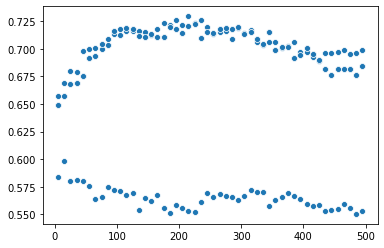

In [0]:
cs = [i for i in knn_random.cv_results_['param_n_neighbors']]
quals = [i for i in knn_random.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

После k > 200 качество начинает падать, поэтому брать большее кол-во k нет смысла

#### RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [0]:
scores(rfc, Tt2, y)

,accuracy,precision,recall,f1
0,0.7675,0.77641,0.752,0.763758


In [0]:
scores(rfc, T2, y)

,accuracy,precision,recall,f1
0,0.766,0.766616,0.766,0.765777


In [0]:
scores(rfc, S2, y)

,accuracy,precision,recall,f1
0,0.7665,0.780732,0.745,0.761527


In [0]:
##### RandomizedSearchCV

Подбор параметров для random forest

In [0]:
random_grid = {'n_estimators': [i for i in range(100, 1501, 200)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [i for i in range(10, 111, 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [0]:
rf_random.fit(S, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1500}

In [0]:
best_random = rf_random.best_estimator_

In [0]:
scores(best_random, S, y)

,accuracy,precision,recall,f1
0,0.776,0.780729,0.769,0.774212


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


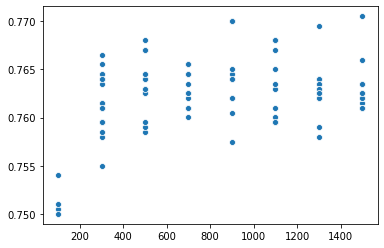

In [0]:
cs = [i for i in rf_random.cv_results_['param_n_estimators']]
quals = [i for i in rf_random.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

Видимо чем больше n_estimators, тем лучше, хотя разница не большая

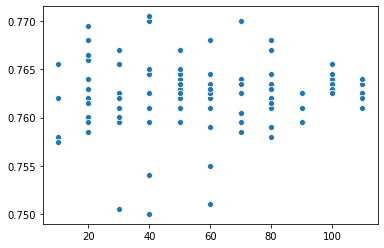

In [0]:
cs = [i for i in rf_random.cv_results_['param_max_depth']]
quals = [i for i in rf_random.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

Лучший результат с max_depth=40, далее качество падает

Потом я решила использовать GridSearchCV, чтобы рассмотреть значения параметров, близкий к лучшему варианту из RandomizedSearchCV

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [900, 1400, 1600]
}
gs = GridSearchCV(rfc, param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [0]:
gs.fit(S, y)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 26.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [0]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
best_rfc = gs.best_estimator_

In [0]:
scores(best_rfc, S, y)

,accuracy,precision,recall,f1
0,0.7775,0.78604,0.765,0.774395


In [0]:
Результат почти такой же, как и в RandomizedSearchCV

#### LinearSVC

Тут тоже нужно будет подобрать параметры

In [0]:
svc = LinearSVC(random_state=42)

In [0]:
scores(svc, Tt2, y)

,accuracy,precision,recall,f1
0,0.8545,0.857807,0.851,0.854153


In [0]:
scores(svc, T2, y)

,accuracy,precision,recall,f1
0,0.854,0.857278,0.851,0.853776


In [0]:
scores(svc, S2, y)

,accuracy,precision,recall,f1
0,0.8445,0.842915,0.85,0.845464
